In [2]:
import matplotlib.pyplot as plt
import numpy as np
import codemodule as cm
from scipy.integrate import trapz

In [3]:
r_c = 4.5
L = '046.78'
frames = cm.read_lammpstrj(f'../coms/MIXTURE_N1-256_N2-256_MPR1-50_MPR2-50_Bend1-00.0_Bend2-30.0_L-{L}-com.lammpstrj',0.2)
adj_mat = cm.dyn_graph_ser(frames,r_c)

6001 frames with 0.2 discard and 1 stride gives back 4801 frames


In [48]:
part_inds=[150,450]
bounds = [2,3,5,10]
binsies = np.arange(0,1.1,0.05)
lags = [1,5,10,20,50]
inds_res = {}

In [49]:
for kind,k in enumerate(part_inds):
    times,res,comps = cm.part_clustser(adj_mat,k)
    N = len(comps)
    for lagind,lag in enumerate(lags):
        for boundind,bound in enumerate(bounds):
            binsies = np.arange(0,1+2*1/(bound-1),1/(bound-1))
            binsies = binsies[:np.where(binsies>1)[0][0]+1]
            print(binsies)
            to_hist = []
            for i in range(lag,len(comps)):
                clust0 = np.array(comps[i-lag])
                clust1 = np.array(comps[i])
                if len(clust0)==bound and len(clust1)>1:
                    a = len(np.intersect1d(clust0,clust1))-1
                    to_hist.append(a/(len(clust0)-1))
                elif len(clust0)==bound and len(clust1)==1:
                    to_hist.append(0.0)
            hist,bins_ = np.histogram(to_hist,bins=binsies,density=True)
                #hist = hist/((binsies[1]-binsies[0])*(N-lag-norm))
            #plt.plot(binsies[:-1],hist, label = f'lag = {lag}')
            print(np.shape(np.vstack((binsies[:-1],hist))))
            inds_res[(k,lag,bound)] = np.column_stack((binsies[:-1],hist))
        #res.append(np.mean(to_hist))
    #plt.plot(lags,res,label = k)
#plt.ylabel('occurences')
#plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#plt.plot(lags,0.57*,color = 'black')
#plt.legend() 
#plt.show()


[0. 1. 2.]
(2, 2)
[0.  0.5 1.  1.5]
(2, 3)
[0.   0.25 0.5  0.75 1.   1.25]
(2, 5)
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.         1.11111111]
(2, 10)
[0. 1. 2.]
(2, 2)
[0.  0.5 1.  1.5]
(2, 3)
[0.   0.25 0.5  0.75 1.   1.25]
(2, 5)
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.         1.11111111]
(2, 10)
[0. 1. 2.]
(2, 2)
[0.  0.5 1.  1.5]
(2, 3)
[0.   0.25 0.5  0.75 1.   1.25]
(2, 5)
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.         1.11111111]
(2, 10)
[0. 1. 2.]
(2, 2)
[0.  0.5 1.  1.5]
(2, 3)
[0.   0.25 0.5  0.75 1.   1.25]
(2, 5)
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.         1.11111111]
(2, 10)
[0. 1. 2.]
(2, 2)
[0.  0.5 1.  1.5]
(2, 3)
[0.   0.25 0.5  0.75 1.   1.25]
(2, 5)
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.5555

In [41]:
print(inds_res[(150,1,2)])

[[0.         0.32730924]
 [1.         0.67269076]]


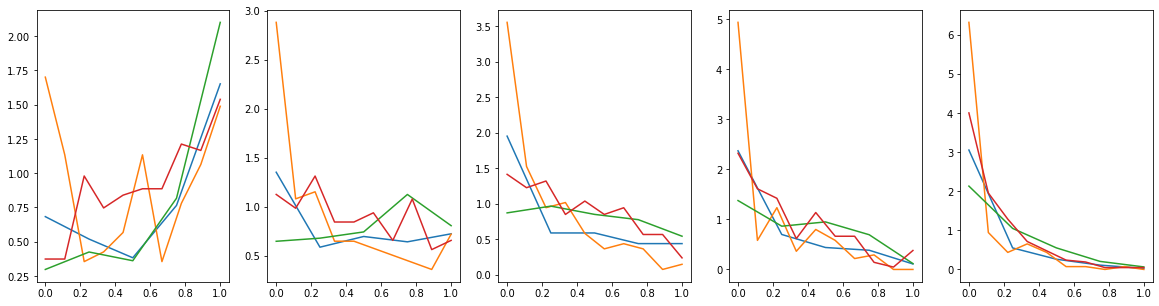

In [46]:
color_dict = {150:'blue',450:'red'}
markers = {2:'.',3:'x',5:'v',10:'3'}
fig,axs = plt.subplots(1,len(lags),figsize = (20,5))
bounds = [5,10]
for partind,part in enumerate(part_inds):
    for sind,s in enumerate(bounds):
        for lagind,lag in enumerate(lags):
            data = inds_res[(part,lag,s)]
            axs[lagind].plot(data[:,0],data[:,1])
#plt.legend()
#plt.savefig(f'SRs/SR_L{L}.pdf')
    